In [1]:
import os
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from modules.config import TMPDIR, DATADIR, FIGDIR
from modules.utils import load_db, normalize_name, print_groupby

In [3]:
db = load_db()
len(db.index)

229

In [4]:
db.framework.unique()

array([None, 'Aave Governance V2', 'Governor Bravo', 'DAOHaus',
       'Governor Alpha', 'Aragon', 'Snapshot'], dtype=object)

In [5]:
db.category.unique()

array(['Protocol', 'Service', 'Investment', 'Social', 'Uncategorized',
       'Grants', 'Product', 'Ventures', 'Guilds', 'Clubs', 'Products'],
      dtype=object)

In [6]:
# Load survey data
columns = ['sentiment_score','decisionmaking_agency','decisionmaking_trust','mission_accomplished','want_need','fulfillment']
questions = ['do you feel a sense of agency in the decision-making process?',
             'do you trust the decision-making process?',
             'does the DAO effectively accomplish its mission?',
             'do you feel wanted and/or needed by the DAO?',
             'does contributing to this DAO bring you a sense of fulfillment?']
df = pd.read_csv(os.path.join(TMPDIR, 'survey_responses.csv'))[['DAO', *columns]]
len(df.index)




157

In [7]:
# Clean, group and display aggregate results for DAOs i 
df['daoName'] = df['DAO'].apply(normalize_name)
df['daoName'].unique()

array(['protein', 'maker', 'baires', 'assange', 'fwb', 'yam', 'jenny',
       'padawan', 'poapathon', 'bankless', 'wgmi', 'olympus',
       'senpaiswap', 'songaday', 'freeross', 'utopiavc', 'atx',
       'ecosystem', 'polygon', 'super', 'dx', 'developer', 'gitcoin',
       'blu3', 'juicebox', 'balancer', 'traxa', 'martian', 'open',
       'people', 'luna', 'kirby', 'limitless', 'temple', 'uniswap',
       'buzzedbears', 'ftw.', 'indexcoop', 'qi', 'wellness', 'canna',
       'sovryn.app', 'opscientia', 'opsciantia', 'metawomen', 'metagame',
       'reliquary', 'giveth', 'bff', 'ens', '1hive', 'ice', 'gro',
       'orange', 'flamingo', 'railgun', 'coordinape', '1inch', 'badger',
       'citi', 'moloch', 'blockbuster', 'her', 'ocean', 'creatorcabins',
       'taiyorobotics', 'sos', '721', 'yungape', 'treasure',
       'theresidence', 'addison', 'blunt', 'irene', 'lightitup',
       'daopunks', 'head', 'tiedyeninjas', 'dream', 'dope', 'daorayaki',
       'lobsters', 'shitcoin', 'spork', 'f

In [8]:
gb = df.groupby('daoName').agg({'daoName': ['count'],
                                  **{c: ['mean', 'median'] for c in columns}})
gb[gb['daoName']['count'] >= 5]

daoName sentiment_score        decisionmaking_agency         \
            count            mean median                  mean median   
daoName                                                                 
bankless       10        4.175000    4.3                   4.1    5.0   
indexcoop       7        4.085714    4.0                   4.0    4.0   
juicebox        5        4.380000    4.5                   4.8    5.0   
open            8        3.987500    4.1                   4.0    4.0   

          decisionmaking_trust        mission_accomplished        want_need  \
                          mean median                 mean median      mean   
daoName                                                                       
bankless              4.500000    4.5             4.500000    4.5  4.200000   
indexcoop             3.571429    4.0             3.714286    4.0  3.285714   
juicebox              4.600000    5.0             4.400000    5.0  4.000000   
open                  4.125000    4.5             4.125000    4.0  3.750000   

                 fulfillment         
          median        mean median  
daoName                              
bankless     4.5    4.300000    4.5  
indexcoop    3.0    4.142857    5.0  
juicebox     4.0    4.000000    4.0  
open         3.5    4.125000    4.5

In [9]:
# Compare with other data sources
df_gb = pd.DataFrame(gb)
df_gb.rename({'daoName': 'all'}, axis=1, inplace=True)
df_all = pd.merge(db, df_gb, on='daoName', how='right')
survey_columns = df_all.columns[7::2]

C:\Users\lucia\AppData\Local\Temp\ipykernel_6880\1270399084.py:4: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  df_all = pd.merge(db, df_gb, on='daoName', how='right')


In [21]:
gb_framework = df_all.groupby('framework').agg({'daoName': ['count'],
                                  **{c: ['mean', 'std'] for c in survey_columns}})
gb_framework = gb_framework[gb_framework['daoName']['count'] > 1]
gb_framework

daoName (sentiment_score, mean)            \
                     count                    mean       std   
framework                                                      
Aave Governance V2       4                4.393750  0.251971   
DAOHaus                 12                4.045407  0.512693   
Governor Bravo           3                3.900000  0.866025   

                   (decisionmaking_agency, mean)            \
                                            mean       std   
framework                                                    
Aave Governance V2                      3.837500  0.567707   
DAOHaus                                 3.872222  1.089420   
Governor Bravo                          4.000000  1.000000   

                   (decisionmaking_trust, mean)            \
                                           mean       std   
framework                                                   
Aave Governance V2                     4.500000  0.408248   
DAOHaus                                4.059425  0.538562   
Governor Bravo                         3.666667  1.527525   

                   (mission_accomplished, mean)           (want_need, mean)  \
                                           mean       std              mean   
framework                                                                     
Aave Governance V2                     4.437500  0.426956          4.175000   
DAOHaus                                4.221329  0.469658          3.676587   
Governor Bravo                         3.333333  1.527525          4.333333   

                             (fulfillment, mean)            
                         std                mean       std  
framework                                                   
Aave Governance V2  0.850000            4.450000  0.420317  
DAOHaus             0.838894            4.070933  0.513390  
Governor Bravo      0.577350            3.333333  1.527525

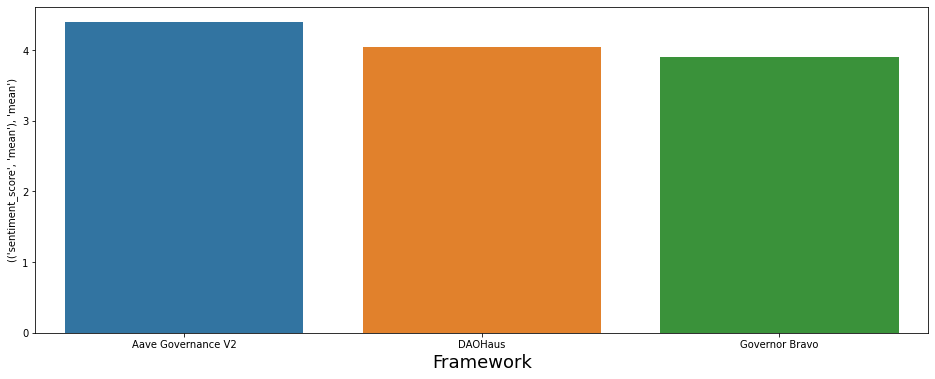

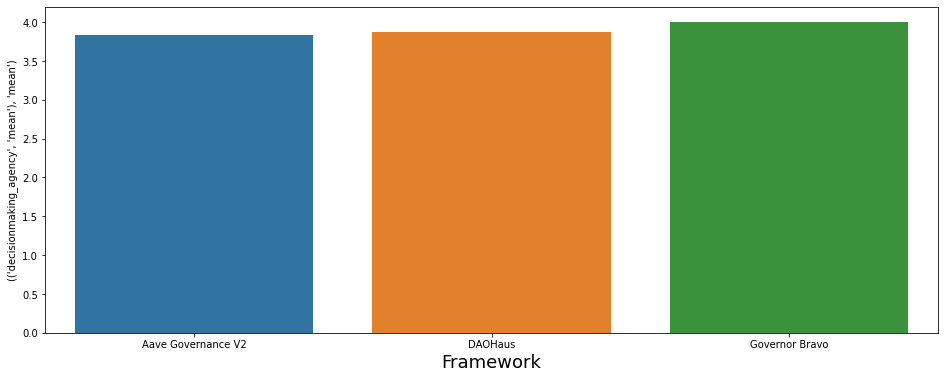

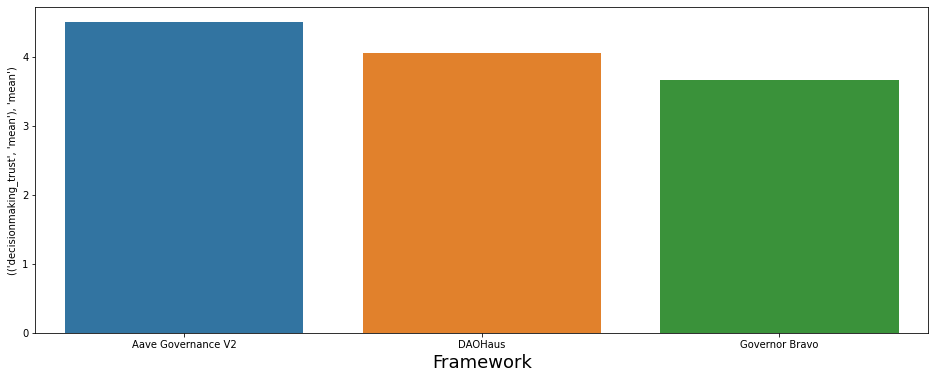

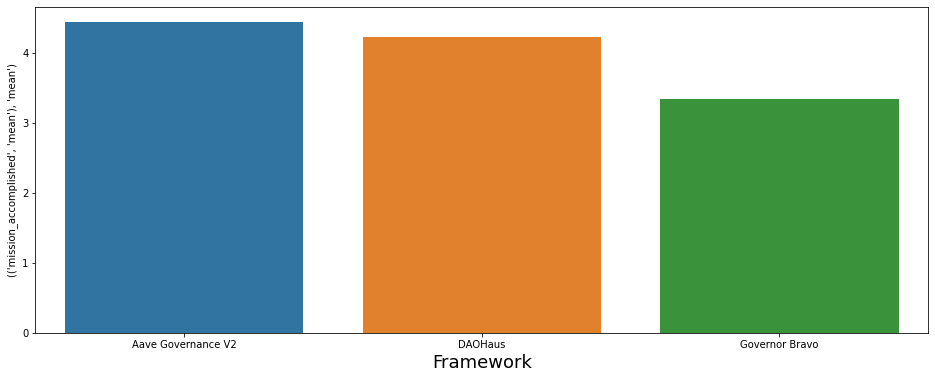

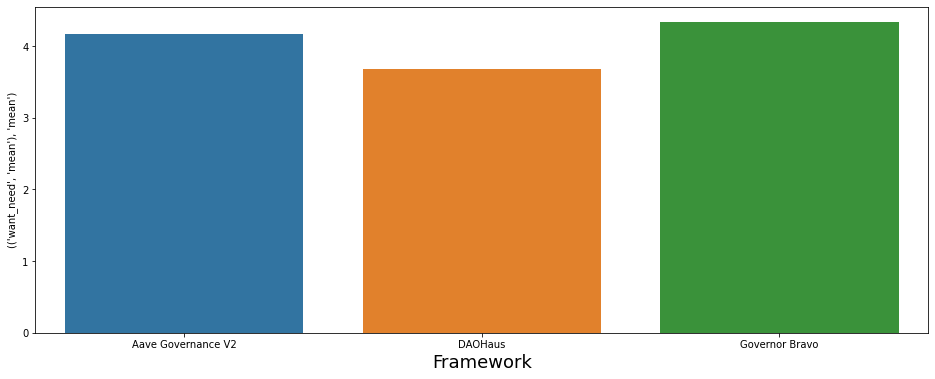

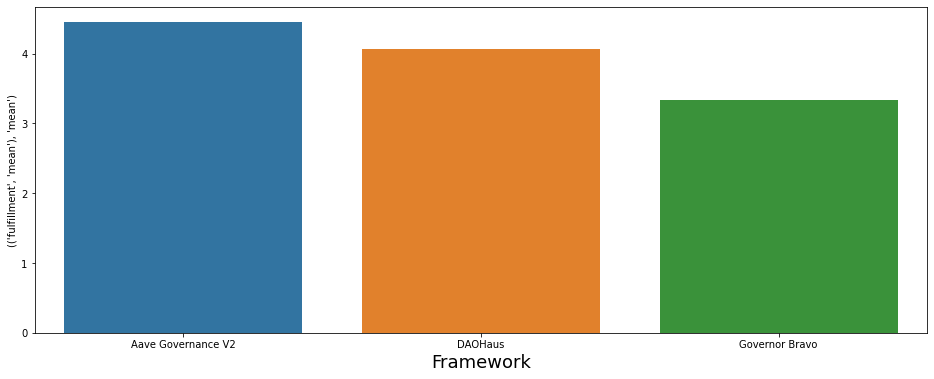

In [23]:
for c in gb_framework.columns[1::2]:
    df = gb_framework[c]
    plt.figure(figsize=(16, 6))
    sns.barplot(x=gb_framework.index, y=c, data=gb_framework, ci=None)
    plt.xlabel('Framework', fontsize=18)
    plt.savefig(os.path.join(TMPDIR, "survey_vs_framework.svg"), dsi=300)
    plt.savefig(os.path.join(TMPDIR, "survey_vs_framework.png"), dsi=300)

In [ ]:
gb_category = df_all.groupby('category').agg({'daoName': ['count'],
                                  **{c: ['mean'] for c in survey_columns}})
gb_category[gb_category['daoName']['count'] > 1]